In [211]:
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as K

import numpy as np
import matplotlib.pyplot as plt
import keras
import pickle
import pandas as pd
from keras import layers
from tensorflow import data
from tensorflow.python.util.tf_export import tf_export
from keras.utils import to_categorical
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [212]:
# open the serialized schema for the binary data input file
with open("../data/feature_dict.pkl", "rb") as f:
    peg_header_dict = pickle.load(f)
dictionary_keys = list(peg_header_dict.keys())
df_tfrecord_headers = pd.DataFrame({'tf_record_header':dictionary_keys})
#df_tfrecord_headers
with open("../annovar/snp_rows.pkl", "rb") as f:
    snplist = pickle.load(f)
print('snplist',snplist)
with open("../annovar/snp_cols.pkl", "rb") as f:
    snpfeatures = pickle.load(f)
print('snpfeatures',snpfeatures)
with open("../annovar/snp_mask.pkl", "rb") as f:
    snpmask = pickle.load(f)
print('snpmask',snpmask)
with open("../annovar/cpg_rows.pkl", "rb") as f:
    cpglist = pickle.load(f)
print('cpglist',cpglist)
with open("../annovar/cpg_cols.pkl", "rb") as f:
    cpgfeatures = pickle.load(f)
print('cpgfeatures',cpgfeatures)
with open("../annovar/cpg_mask.pkl", "rb") as f:
    cpgmask = pickle.load(f)
print('cpgmask',cpgmask)
#cpglist

snplist ['rs3762352_C', 'rs1043793_A', 'rs10184015_A', 'GSA-rs1035142_T', 'rs842416_G', 'rs10010994_C', 'rs2381387_G', 'rs2532941_G', 'rs2532925_G', 'rs9268853_T', 'rs9268923_C', 'rs2395185_G', 'rs9268969_C', 'rs9405108_C', 'rs35445101_A', 'rs9270984_T', 'rs9270986_A', 'rs9271155_G', 'GSA-rs9271469_T', 'GSA-rs9453585_C', 'rs2466940_G', 'GSA-rs10750097_G', 'exm2267473_G', 'GSA-rs1040961_G', 'rs10135861_C', 'rs7155050_A', 'rs2296405_T', 'GSA-rs295848_G', 'rs183211_G', 'rs199533_G', 'rs199501_A']
snpfeatures ['C1orf109', 'intronic', 'SOS1', 'UTR3', 'FLACC1', 'RFTN1', 'PROM1', 'UGDH-AS1', 'ncRNA_intronic', 'VARS2', 'SFTA2', 'HLA-DRA', 'HLA-DRB5', 'intergenic', 'HLA-DRB1', 'exonic', 'HLA-DQA1', 'SLC25A51P1', 'LOC102723883', 'DDX10', 'APOA5', 'upstream', 'CDK2AP1', 'SBNO1', 'LHFPL6', 'NUMB', 'DIO3', 'LINC00239', 'CDH3', 'MRM1', 'LHX1-DT', 'NSF', 'WNT3']
snpmask [[1. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [

In [213]:
#df_gwas_pvalues = pd.read_csv('../inputs/gwas_pvalues.txt',header=None,names=['snp_id','p_value'],sep='\t')
#df_gwas_pvalues
#df_merged1 = pd.merge(df_tfrecord_headers,df_gwas_pvalues,left_on='tf_record_header',right_on='snp_id')
#df_merged1
#sig_snps = df_merged1[df_merged1['p_value']<.0001]['snp_id']
#snplist = list(sig_snps.values)
print('snplist',(snplist))
#df_ewas_pvalues = pd.read_csv('../inputs/ewas_pvalues.txt',header=None,names=['cpg_id','p_value'],sep='\t')
#df_merged2 = pd.merge(df_tfrecord_headers,df_ewas_pvalues,left_on='tf_record_header',right_on='cpg_id')
#df_merged2
#sig_cpgs = df_merged2[df_merged2['p_value']<.0001]['cpg_id']
#cpglist = list(sig_cpgs.values)
print('cpglist',(cpglist))
#df_merged2.sort_values('p_value')

snplist ['rs3762352_C', 'rs1043793_A', 'rs10184015_A', 'GSA-rs1035142_T', 'rs842416_G', 'rs10010994_C', 'rs2381387_G', 'rs2532941_G', 'rs2532925_G', 'rs9268853_T', 'rs9268923_C', 'rs2395185_G', 'rs9268969_C', 'rs9405108_C', 'rs35445101_A', 'rs9270984_T', 'rs9270986_A', 'rs9271155_G', 'GSA-rs9271469_T', 'GSA-rs9453585_C', 'rs2466940_G', 'GSA-rs10750097_G', 'exm2267473_G', 'GSA-rs1040961_G', 'rs10135861_C', 'rs7155050_A', 'rs2296405_T', 'GSA-rs295848_G', 'rs183211_G', 'rs199533_G', 'rs199501_A']
cpglist ['cg24088508', 'cg02502145', 'cg04657470', 'cg07227024', 'cg23186955', 'cg11956442', 'cg17858192', 'cg01341801', 'cg04145681', 'cg10154826', 'cg12556569', 'cg09084244', 'cg15611600', 'cg17707870', 'cg23247274', 'cg13655169', 'cg11331837', 'cg12609785', 'cg18984499']


In [214]:
labellist=['label']
covlist=['subject1','Female','Age','k1a','k2a','k3a','Mono','Gran','CD4T','NK','CD8_naive','CD8pCD28nCD45RAn','PlasmaBlast']
#snplist=['subject1','GSA-rs2294942_G','rs1939015_G','rs3762352_C','rs525157_A','rs72660967_T','rs6142884_A']
#cpglist=['subject1','cg25929399','cg05704942','cg10306192','cg24088508','cg20089799','cg06961873','cg00704664','cg06961873']
featurelist = covlist+snplist+cpglist
fulllist = featurelist+labellist
# print('covlist',covlist)

sample_size = 551
shuffle_buffer = sample_size
repeats = 10
batch_size = 128
train_proportion = 0.7
print('train_proportion',train_proportion)
train_samples = sample_size * 0.7
print('train_samples',train_samples)
val_samples = sample_size - train_samples
train_batches = int(train_samples/batch_size)
print('train_batches',train_batches)
val_batches = int(val_samples/batch_size)
print('val_batches',val_batches)
peg_header_dict_subset = {}
for f in fulllist:
    if f in peg_header_dict:
        peg_header_dict_subset[f] = peg_header_dict[f]
        
#print('dictionary for tfrecord:',peg_header_dict_subset)


train_proportion 0.7
train_samples 385.7
train_batches 3
val_batches 1


In [215]:

# Sample string labels
labels = ['cases','controls']

feature_description = peg_header_dict_subset
def parse_single(example_proto,sublist):
    # Parse the input `tf.train.Example` proto using the dictionary above.
    diction = tf.io.parse_single_example(example_proto, feature_description)
    # convert label to a float
    label = diction['label']
    intlabel = tf.constant(0.0,dtype='float32')
    if label=='cases':
        intlabel = tf.constant(1.0,dtype='float32')
    diction['label'] = intlabel
    filteredlist = {key:diction[key] for key in sublist}
    return filteredlist

def floatcaster(features):
    casted = [tf.cast(features[column], tf.float32)  for column in features if tf.debugging.is_numeric_tensor(features[column])]
    #print('casted',casted)
    features = tf.concat(  tf.transpose(casted), 1)    
    return features
  
def parse_batched(features,covlist,snplist,cpglist,labellist):
    feature_dict = {}
    feature_dict['cov_input'] = floatcaster( {key:features[key] for key in covlist} )
    feature_dict['snp_input'] = floatcaster( {key:features[key] for key in snplist} )
    feature_dict['cpg_input'] = floatcaster( {key:features[key] for key in cpglist} )
    labels = features[labellist[0]]
    return (feature_dict,labels)
    



In [216]:
filenames = ['../data/dataset.tfrecords']
raw_dataset = tf.data.TFRecordDataset(filenames)
# shuffled_dataset = raw_dataset.shuffle(shuffle_buffer)
# train,val = keras.utils.split_dataset(shuffled_dataset,left_size = 0.7)
# print('train',train.cardinality())
# print('val',val.cardinality())

full_dataset = raw_dataset.map(lambda x: parse_single(x,featurelist+labellist))
#print('full',full_dataset)

batched_dataset = full_dataset.shuffle(shuffle_buffer).batch(batch_size).map(lambda features:parse_batched(features,covlist,snplist,cpglist,labellist))
print('batched',batched_dataset)
#print('batched2',next(iter(batched_dataset2)))
# train,val = keras.utils.split_dataset(batched_dataset,left_size = 0.7)
train = batched_dataset.take(train_batches)
# print('train',train.cardinality())
val = batched_dataset.skip(train_batches)
# print('val',val.cardinality())
# print('cov dim',train.element_spec[0]['cov_input'].shape[1])
# print('snp dim',train.element_spec[0]['snp_input'].shape[1])
# print('cpg dim',train.element_spec[0]['cpg_input'].shape[1])
#print('training sample',next(iter(train)))

batched <_MapDataset element_spec=({'cov_input': TensorSpec(shape=(None, 12), dtype=tf.float32, name=None), 'snp_input': TensorSpec(shape=(None, 31), dtype=tf.float32, name=None), 'cpg_input': TensorSpec(shape=(None, 19), dtype=tf.float32, name=None)}, TensorSpec(shape=(None,), dtype=tf.float32, name=None))>


In [217]:
@tf_export('keras.layers.MaskedDense')
class MaskedDense(layers.Layer):
    def __init__(self, units, mask, **kwargs):
        super(MaskedDense, self).__init__(**kwargs)
        self.units = units
        self.mask = mask  # Mask should be a numpy array or a tensor

    def build(self, input_shape):
        self.kernel = self.add_weight(
            name='kernel',
            shape=(input_shape[-1], self.units),
            initializer='glorot_uniform',
            trainable=True
        )
        self.bias = self.add_weight(
            name='bias',
            shape=(self.units,),
            initializer='zeros',
            trainable=True
        )
        super(MaskedDense, self).build(input_shape)

    def call(self, inputs):
        masked_kernel = self.kernel * tf.cast(self.mask, self.kernel.dtype)
        output = tf.matmul(inputs, masked_kernel)
        output = tf.nn.bias_add(output, self.bias)
        return output

    def get_config(self):
        config = super(MaskedDense, self).get_config()
        config.update({
            'units': self.units,
            'mask': self.mask.tolist() if hasattr(self.mask, 'tolist') else self.mask,  # Handle numpy arrays or tensors
        })
        return config

    @classmethod
    def from_config(cls, config):
        mask = config.pop('mask')
        return cls(mask=mask, **config)
testmask = np.zeros((4,3))
testmask[2,2] = 1
layer = MaskedDense(units=3,mask=testmask)
print('layer',layer)
print('config',layer.get_config())

layer <MaskedDense name=masked_dense_13, built=False>
config {'name': 'masked_dense_13', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 3, 'mask': [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 0.0]]}


In [218]:

class make_connection(tf.keras.constraints.Constraint):    
    def __init__(self, mask):
        self.mask = mask
        
    def __call__(self, w):
        # tf.keras.backend.set_value(w[0],tf.constant(1,dtype=tf.float32))
        # print('mask',self.mask)
        # print('random',w)        
        return tf.math.multiply(w,self.mask)
        # print('mult',mult)
        # tf.keras.backend.set_value(w,mult)
        # tf.keras.backend.set_value(w[1, 2], 1)
        # tf.keras.backend.set_value(w[2, 1], 1)
        # tf.keras.backend.set_value(w[2, 2], 1)    
        # return w
        
def create_cov_model(dataset):
    covariates = dataset.element_spec[0]['cov_input'].shape[1]
    print('covariates',covariates)    
    inputs = layers.Input(shape=(covariates,),name='cov_input')
    x = layers.Dense(1,name='cov_output')(inputs)
    #x = layers.Activation("relu",name='cov_relu')(x)
    x = layers.Activation("tanh",name='cov_tanh')(x)
    return keras.models.Model(inputs,x,name='cov_model')
cov_model =create_cov_model(train)
print(cov_model.summary())
def get_snp_mask(snps,genes):
    # mask = tf.Variable(np.zeros((snps,genes),dtype='float32'))    
    
    # for gene in range(genes):
    #     for snp in range(3*gene,3*gene+3):
    #         tf.keras.backend.set_value(mask[snp,gene],1.0)
    #         #tf.keras.backend.set_value(mask[snp+1,gene],1.0)
    mask = tf.Variable(snpmask)
    print('snpmask',mask)
    return mask
def create_snp_model(dataset):
    snps = dataset.element_spec[0]['snp_input'].shape[1]            
    genes = len(snpfeatures)
    print('snps:',snps,'genes:',genes)
    snp_mask = get_snp_mask(snps,genes)    
    inputs = layers.Input(shape=(snps,),name='snp_input')
    x = layers.Dense(genes,name='snpgene_linear',kernel_constraint=make_connection(snp_mask))(inputs)
    #x = layers.Dense(32,name='snpgene_linear')(inputs)
    x = layers.Activation("tanh",name='snpgene_tanh')(x)
    #x = layers.Activation("relu",name='snpgene_relu')(x)
    #x = layers.BatchNormalization(center=False,scale=False,name='snpgene_normalization')(x)
    #x = layers.Dense(1,name='snpgene_output_linear')(x)
    #x = layers.Activation("relu",name='snpgene_output_relu')(x)
    return keras.models.Model(inputs,x,name='snp_model')
snp_model = create_snp_model(train)
print(snp_model.summary())
def get_cpg_mask(cpgs,genes):
    # mask = tf.Variable(np.zeros((cpgs,genes),dtype='float32'))    
    # for gene in range(genes):
    #     for cpg in range(2*gene,2*gene+2):
    #         tf.keras.backend.set_value(mask[cpg,gene],1.0)
    #         #tf.keras.backend.set_value(mask[cpg+1,gene],1.0)
    mask = tf.Variable(cpgmask)
    print('cpgmask',mask)
    return mask
def create_cpg_model(dataset):
    cpgs = dataset.element_spec[0]['cpg_input'].shape[1]
    genes = len(cpgfeatures)
    print('cpgs:',cpgs,'genes:',genes)    
    cpg_mask = get_cpg_mask(cpgs,genes)
    inputs = layers.Input(shape=(cpgs,),name='cpg_input')
    x = layers.Dense(genes,name='cpggene_linear',kernel_constraint=make_connection(cpg_mask))(inputs)
    #x = layers.Dense(32,name='cpggene_linear')(inputs)
    #x = layers.Activation("relu",name='cpggene_relu')(x)
    x = layers.Activation("tanh",name='cpggene_tanh')(x)
    #x = layers.BatchNormalization(center=False,scale=False,name='cpggene_normalization')(x)
    #x = layers.Dense(1,name='cpggene_output_linear')(x)
    #x = layers.Activation("relu",name='cpggene_output_relu')(x)
    return keras.models.Model(inputs,x,name='cpg_model')
cpg_model = create_cpg_model(train)
print(cpg_model.summary())

def create_pathway_model(cov_model,snp_model,cpg_model):
    pathwayInput = layers.concatenate([cov_model.output,snp_model.output,cpg_model.output],name='combine_snp_cpg')
    #pathwayInput = layers.concatenate([snp_model.output,cpg_model.output],name='combine_snp_cpg')
    print('pathwayinputshape',pathwayInput.shape)
    x = layers.BatchNormalization(center=False,scale=False,name='pathwayinput_normalization')(pathwayInput)
    # x = layers.Dense(4,name='pathway_level1_linear')(x)
    # x = layers.Activation("relu",name='pathway_leve11_activation')(x)
    # x = layers.BatchNormalization(center=False,scale=False,name='pathway_level1_normalization')(x)
    # x = layers.Dense(3,name='pathway_level_2_linear')(x)
    # x = layers.Activation("relu",name='pathway_level2_activation')(x)
    #x = layers.BatchNormalization(center=False,scale=False,name='pathway_level2_normalization')(x)
    #x = layers.concatenate([cov_model.output,x],name='combine_cov_pathway')
    x = layers.Dense(1,name='pathway_output_linear')(x)
    x = layers.Activation("sigmoid",name='pathway_output_activation')(x)
    #return keras.models.Model(inputs=[cov_model.input,snp_model.input,cpg_model.input],outputs=x)
    return keras.models.Model(inputs={'cov_input':cov_model.input,'snp_input':snp_model.input,'cpg_input':cpg_model.input},outputs=x,name='pathway_model')
pathway_model = create_pathway_model(cov_model,snp_model,cpg_model)

print('Pathway model inputs:',pathway_model.inputs)
print('Pathway model architecture',pathway_model.summary())

covariates 12


Model: "cov_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ cov_input (InputLayer)          │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cov_output (Dense)              │ (None, 1)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cov_tanh (Activation)           │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

None
snps: 31 genes: 33
snpmask <tf.Variable 'Variable:0' shape=(31, 33) dtype=float32, numpy=
array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]], shape=(31, 33), dtype=float32)>


Model: "snp_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ snp_input (InputLayer)          │ (None, 31)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ snpgene_linear (Dense)          │ (None, 33)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ snpgene_tanh (Activation)       │ (None, 33)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,056 (4.12 KB)

 Trainable params: 1,056 (4.12 KB)

 Non-trainable params: 0 (0.00 B)

None
cpgs: 19 genes: 30
cpgmask <tf.Variable 'Variable:0' shape=(19, 30) dtype=float32, numpy=
array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0.,

Model: "cpg_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ cpg_input (InputLayer)          │ (None, 19)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cpggene_linear (Dense)          │ (None, 30)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cpggene_tanh (Activation)       │ (None, 30)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 600 (2.34 KB)

 Trainable params: 600 (2.34 KB)

 Non-trainable params: 0 (0.00 B)

None
pathwayinputshape (None, 64)
Pathway model inputs: [<KerasTensor shape=(None, 12), dtype=float32, sparse=False, ragged=False, name=cov_input>, <KerasTensor shape=(None, 19), dtype=float32, sparse=False, ragged=False, name=cpg_input>, <KerasTensor shape=(None, 31), dtype=float32, sparse=False, ragged=False, name=snp_input>]


Model: "pathway_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ cov_input           │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ snp_input           │ (None, 31)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cpg_input           │ (None, 19)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cov_output (Dense)  │ (None, 1)         │         13 │ cov_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ snpgene_linear      │ (None, 33)        │      1,056 │ snp_input[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cpggene_linear      │ (None, 30)        │        600 │ cpg_input[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cov_tanh            │ (None, 1)         │          0 │ cov_output[0][0]  │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ snpgene_tanh        │ (None, 33)        │          0 │ snpgene_linear[0… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cpggene_tanh        │ (None, 30)        │          0 │ cpggene_linear[0… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combine_snp_cpg     │ (None, 64)        │          0 │ cov_tanh[0][0],   │
│ (Concatenate)       │                   │            │ snpgene_tanh[0][… │
│                     │                   │            │ cpggene_tanh[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pathwayinput_norma… │ (None, 64)        │        128 │ combine_snp_cpg[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pathway_output_lin… │ (None, 1)         │         65 │ pathwayinput_nor… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pathway_output_act… │ (None, 1)         │          0 │ pathway_output_l… │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,862 (7.27 KB)

 Trainable params: 1,734 (6.77 KB)

 Non-trainable params: 128 (512.00 B)

Pathway model architecture None


In [223]:
optimizer = keras.optimizers.Adam(learning_rate=0.1)
#pathway_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

pathway_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=[tf.keras.metrics.AUC()])

rfrun_path = '../output/'
csv_logger = K.callbacks.CSVLogger(rfrun_path + 'log.csv', append=True, separator=';')
earlystop =K.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=25, verbose=1, mode='auto')
saveBestModel = K.callbacks.ModelCheckpoint(rfrun_path + "bestweight_job.keras", monitor='val_loss',
                                          verbose=1, save_best_only=True, mode='auto')
reduce_lr = K.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)


history = pathway_model.fit(train ,validation_data=val,epochs=20,verbose=1,callbacks=[earlystop, saveBestModel, csv_logger, reduce_lr])

Epoch 1/20


2025-06-13 17:57:38.152167: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 508 of 551


      1/Unknown 13s 13s/step - auc_3: 0.5740 - loss: 0.7292

2025-06-13 17:57:38.968922: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
/home/garyc/anaconda3/envs/omics/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
2025-06-13 17:57:49.385056: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 479 of 551



Epoch 1: val_loss improved from inf to 0.69489, saving model to ../output/bestweight_job.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - auc_3: 0.5483 - loss: 0.7758 - val_auc_3: 0.5602 - val_loss: 0.6949 - learning_rate: 0.1000
Epoch 2/20


2025-06-13 17:57:50.789544: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 17:58:00.899691: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 498 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 22s 11s/step - auc_3: 0.5425 - loss: 0.7396

2025-06-13 17:58:01.926944: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 17:58:12.017411: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 504 of 551



Epoch 2: val_loss improved from 0.69489 to 0.67736, saving model to ../output/bestweight_job.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - auc_3: 0.5290 - loss: 0.7557 - val_auc_3: 0.5729 - val_loss: 0.6774 - learning_rate: 0.1000
Epoch 3/20


2025-06-13 17:58:12.916030: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 17:58:41.867583: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 499 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 59s 30s/step - auc_3: 0.6415 - loss: 0.6660

2025-06-13 17:58:42.836533: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 17:58:52.900297: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 491 of 551



Epoch 3: val_loss improved from 0.67736 to 0.67681, saving model to ../output/bestweight_job.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - auc_3: 0.6048 - loss: 0.6942 - val_auc_3: 0.5957 - val_loss: 0.6768 - learning_rate: 0.1000
Epoch 4/20


2025-06-13 17:58:54.097031: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 17:58:54.117574: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-06-13 17:59:04.206823: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 479 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 23s 12s/step - auc_3: 0.5361 - loss: 0.7702

2025-06-13 17:59:05.675858: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 17:59:15.751689: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 501 of 551



Epoch 4: val_loss did not improve from 0.67681
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - auc_3: 0.5597 - loss: 0.7503 - val_auc_3: 0.6177 - val_loss: 0.7375 - learning_rate: 0.1000
Epoch 5/20


2025-06-13 17:59:16.728417: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 17:59:26.797862: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 488 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 22s 11s/step - auc_3: 0.6732 - loss: 0.6429

2025-06-13 17:59:28.029632: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 17:59:38.091533: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 504 of 551



Epoch 5: val_loss improved from 0.67681 to 0.65647, saving model to ../output/bestweight_job.keras


2025-06-13 17:59:39.045716: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3/3 ━━━━━━━━━━━━━━━━━━━━ 60s 24s/step - auc_3: 0.6264 - loss: 0.6792 - val_auc_3: 0.4924 - val_loss: 0.6565 - learning_rate: 0.1000
Epoch 6/20


2025-06-13 18:00:26.346537: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 497 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 22s 11s/step - auc_3: 0.6396 - loss: 0.6502

2025-06-13 18:00:27.341356: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:00:37.404572: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 507 of 551



Epoch 6: val_loss did not improve from 0.65647
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - auc_3: 0.6205 - loss: 0.6701 - val_auc_3: 0.5452 - val_loss: 0.6891 - learning_rate: 0.1000
Epoch 7/20


2025-06-13 18:00:38.279096: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:00:48.346176: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 500 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 22s 11s/step - auc_3: 0.6845 - loss: 0.6256

2025-06-13 18:00:49.324866: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:00:59.390153: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 492 of 551



Epoch 7: val_loss did not improve from 0.65647
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - auc_3: 0.6459 - loss: 0.6526 - val_auc_3: 0.6289 - val_loss: 0.6911 - learning_rate: 0.1000
Epoch 8/20


2025-06-13 18:01:00.714111: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:01:10.797521: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 491 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 22s 11s/step - auc_3: 0.5928 - loss: 0.6652

2025-06-13 18:01:11.979349: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:01:40.390344: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 524 of 551



Epoch 8: val_loss did not improve from 0.65647
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 14s/step - auc_3: 0.6112 - loss: 0.6639 - val_auc_3: 0.5806 - val_loss: 0.7503 - learning_rate: 0.1000
Epoch 9/20


2025-06-13 18:01:40.890795: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:01:50.952109: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 509 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 21s 11s/step - auc_3: 0.6086 - loss: 0.6895

2025-06-13 18:01:51.751712: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:02:01.811061: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 484 of 551



Epoch 9: val_loss did not improve from 0.65647
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - auc_3: 0.6268 - loss: 0.6740 - val_auc_3: 0.5998 - val_loss: 0.7326 - learning_rate: 0.1000
Epoch 10/20


2025-06-13 18:02:03.155016: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:02:13.226770: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 492 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 22s 11s/step - auc_3: 0.6528 - loss: 0.6569

2025-06-13 18:02:14.429268: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:02:24.483934: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 514 of 551



Epoch 10: val_loss did not improve from 0.65647
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - auc_3: 0.6544 - loss: 0.6564 - val_auc_3: 0.5498 - val_loss: 0.7707 - learning_rate: 0.1000
Epoch 11/20


2025-06-13 18:02:25.176327: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:02:35.262804: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 509 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 21s 11s/step - auc_3: 0.6842 - loss: 0.6285

2025-06-13 18:02:36.090051: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:02:46.151276: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 493 of 551



Epoch 11: val_loss did not improve from 0.65647
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - auc_3: 0.6576 - loss: 0.6414 - val_auc_3: 0.6607 - val_loss: 0.7057 - learning_rate: 0.0200


2025-06-13 18:02:47.298738: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


Epoch 12/20


2025-06-13 18:03:02.336055: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 484 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 22s 11s/step - auc_3: 0.6345 - loss: 0.6511

2025-06-13 18:03:03.633819: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:03:27.155472: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 505 of 551



Epoch 12: val_loss did not improve from 0.65647
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 12s/step - auc_3: 0.6484 - loss: 0.6400 - val_auc_3: 0.5558 - val_loss: 0.7189 - learning_rate: 0.0200
Epoch 13/20


2025-06-13 18:03:28.040341: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:03:38.126654: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 518 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 21s 11s/step - auc_3: 0.6754 - loss: 0.6417

2025-06-13 18:03:38.733781: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:03:48.803603: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 506 of 551



Epoch 13: val_loss did not improve from 0.65647
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - auc_3: 0.6734 - loss: 0.6395 - val_auc_3: 0.6940 - val_loss: 0.7185 - learning_rate: 0.0200
Epoch 14/20


2025-06-13 18:03:49.665486: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:03:59.742235: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 497 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 22s 11s/step - auc_3: 0.6857 - loss: 0.6250

2025-06-13 18:04:00.824060: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:04:10.899925: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 526 of 551



Epoch 14: val_loss did not improve from 0.65647
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - auc_3: 0.6988 - loss: 0.6188 - val_auc_3: 0.5934 - val_loss: 0.7400 - learning_rate: 0.0200
Epoch 15/20


2025-06-13 18:04:11.365588: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:04:21.435098: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 506 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 21s 11s/step - auc_3: 0.6571 - loss: 0.6545

2025-06-13 18:04:22.291515: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:04:32.346525: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 508 of 551



Epoch 15: val_loss did not improve from 0.65647
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - auc_3: 0.6672 - loss: 0.6366 - val_auc_3: 0.5816 - val_loss: 0.7266 - learning_rate: 0.0200
Epoch 16/20


2025-06-13 18:04:33.173393: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:04:43.274678: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 510 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 21s 11s/step - auc_3: 0.7178 - loss: 0.6228

2025-06-13 18:04:44.061592: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:04:54.129185: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 511 of 551



Epoch 16: val_loss did not improve from 0.65647
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - auc_3: 0.6951 - loss: 0.6281 - val_auc_3: 0.6186 - val_loss: 0.7570 - learning_rate: 0.0040
Epoch 17/20


2025-06-13 18:04:54.916096: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:05:05.007230: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 517 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 21s 11s/step - auc_3: 0.7103 - loss: 0.6127

2025-06-13 18:05:05.634698: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:05:15.688077: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 499 of 551



Epoch 17: val_loss did not improve from 0.65647
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - auc_3: 0.6983 - loss: 0.6203 - val_auc_3: 0.5978 - val_loss: 0.7169 - learning_rate: 0.0040
Epoch 18/20


2025-06-13 18:05:16.665688: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:05:26.735309: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 490 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 22s 11s/step - auc_3: 0.6595 - loss: 0.6403

2025-06-13 18:05:27.905021: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:05:37.966945: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 487 of 551



Epoch 18: val_loss did not improve from 0.65647
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - auc_3: 0.6734 - loss: 0.6331 - val_auc_3: 0.6246 - val_loss: 0.7248 - learning_rate: 0.0040
Epoch 19/20


2025-06-13 18:05:39.240888: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:05:49.300013: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 510 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 21s 11s/step - auc_3: 0.7128 - loss: 0.6187

2025-06-13 18:05:50.062901: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:06:00.168810: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 513 of 551



Epoch 19: val_loss did not improve from 0.65647
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - auc_3: 0.6964 - loss: 0.6254 - val_auc_3: 0.5754 - val_loss: 0.7558 - learning_rate: 0.0040
Epoch 20/20


2025-06-13 18:06:00.860740: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:06:10.935244: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 505 of 551


1/3 ━━━━━━━━━━━━━━━━━━━━ 21s 11s/step - auc_3: 0.6847 - loss: 0.6274

2025-06-13 18:06:11.805206: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-13 18:06:41.135518: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:694: Filling up shuffle buffer (this may take a while): 510 of 551



Epoch 20: val_loss did not improve from 0.65647
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 15s/step - auc_3: 0.6985 - loss: 0.6193 - val_auc_3: 0.6336 - val_loss: 0.7207 - learning_rate: 0.0040


2025-06-13 18:06:41.924744: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


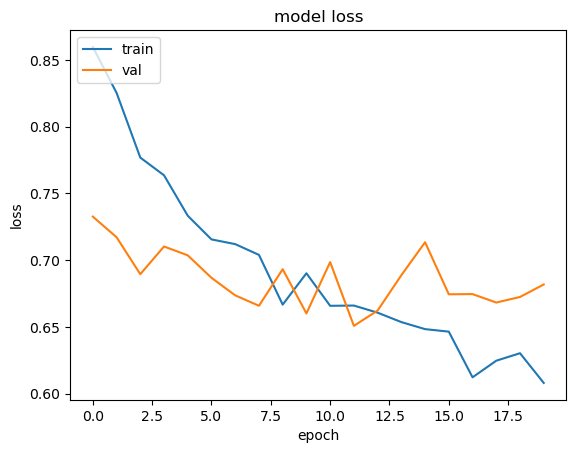

In [200]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

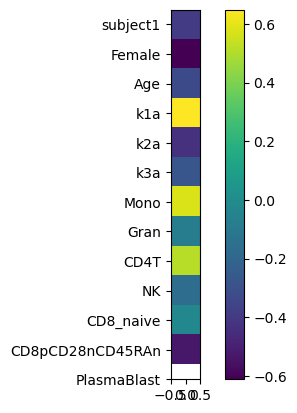

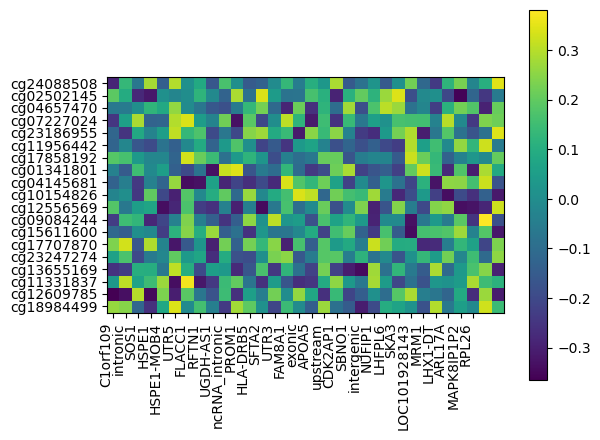

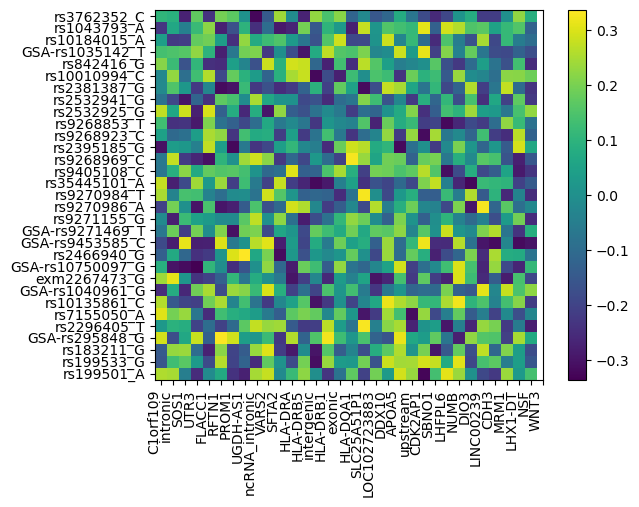

In [201]:
fig, ax = plt.subplots()
# im = ax.imshow(data)

cov_weights = pathway_model.get_layer('cov_output').get_weights()[0]
# print('cov_weights_matrix',cov_weights)
# x_labels = cpg_features
y_labels = covlist

im = ax.imshow(cov_weights, cmap='viridis') # 'viridis' is a colormap
# ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))
ax.set_yticklabels(y_labels)
fig.colorbar(im) # Add a colorbar to show the scale
plt.show()

fig, ax = plt.subplots()
cpg_weights = pathway_model.get_layer('cpggene_linear').get_weights()[0]
#print('cpg_gene_weights_matrix',cpg_weights)
x_labels = cpgfeatures
y_labels = cpglist

im = ax.imshow(cpg_weights, cmap='viridis') # 'viridis' is a colormap
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels,rotation=90, ha='right')
ax.set_yticks(np.arange(len(y_labels)))
ax.set_yticklabels(y_labels)
fig.colorbar(im) # Add a colorbar to show the scale
plt.show()

fig, ax = plt.subplots()
snp_weights = pathway_model.get_layer('snpgene_linear').get_weights()[0]
#print('snp_gene_weights_matrix',snp_weights)
x_labels = snpfeatures
y_labels = snplist
im = ax.imshow(snp_weights, cmap='viridis') # 'viridis' is a colormap
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels,rotation=90, ha='right')
ax.set_yticks(np.arange(len(y_labels)))
ax.set_yticklabels(y_labels)
fig.colorbar(im) # Add a colorbar to show the scale
plt.show()